### Vizualize Loss

In [1]:
%matplotlib inline

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("./forward_model/")
import stacklineplot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [10]:
# dir = "~/server/reonconstructed_eegs/"
dir = "./reonconstructed_eegs/"
filename = "convVAE-lr1e-4-N256-C44-L1004-A.npy"
# filename = "convVAE-lr1e-5-N256-C44-L1004-C.npy"

In [11]:
costs = np.load(dir + filename)

In [12]:
iters = np.arange(costs.shape[0]) * 100

<function matplotlib.pyplot.show(*args, **kw)>

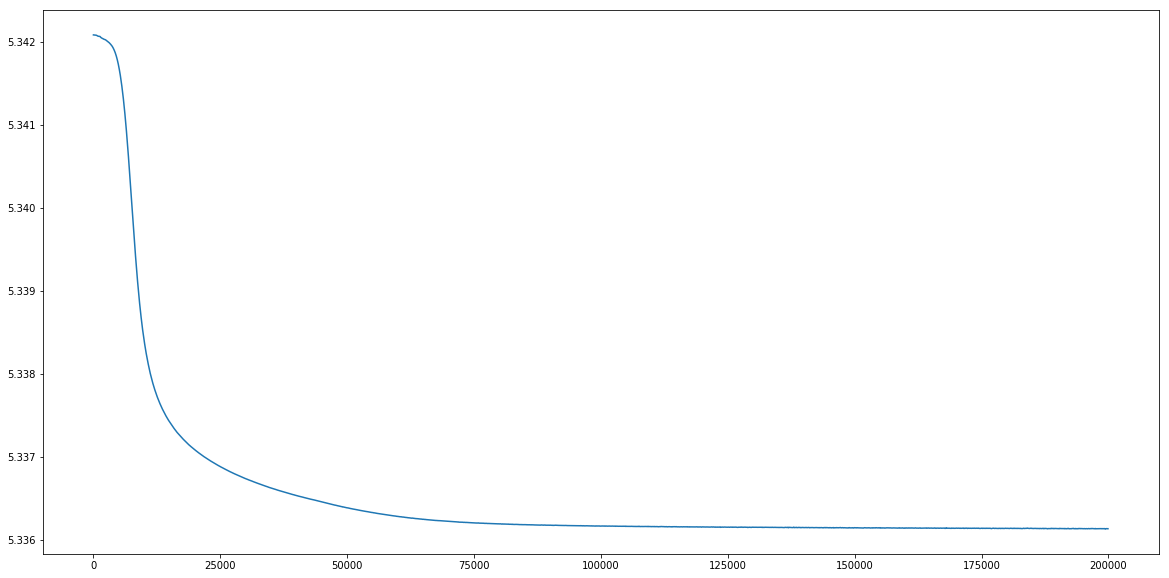

In [13]:
plt.plot(iters, costs)
plt.show

### Vizualize Reconstructions

In [20]:
prefix = "A"
iter = 1999

In [21]:
filename_generated = prefix + "-generated-" + str(iter) + ".npy" 
filename_original = prefix + "-orginal-" + str(iter) + ".npy"

In [22]:
generated = np.load(dir + filename_generated)
original = np.load(dir + filename_original)

In [23]:
labels = [str(i) for i in range(generated.shape[0])]

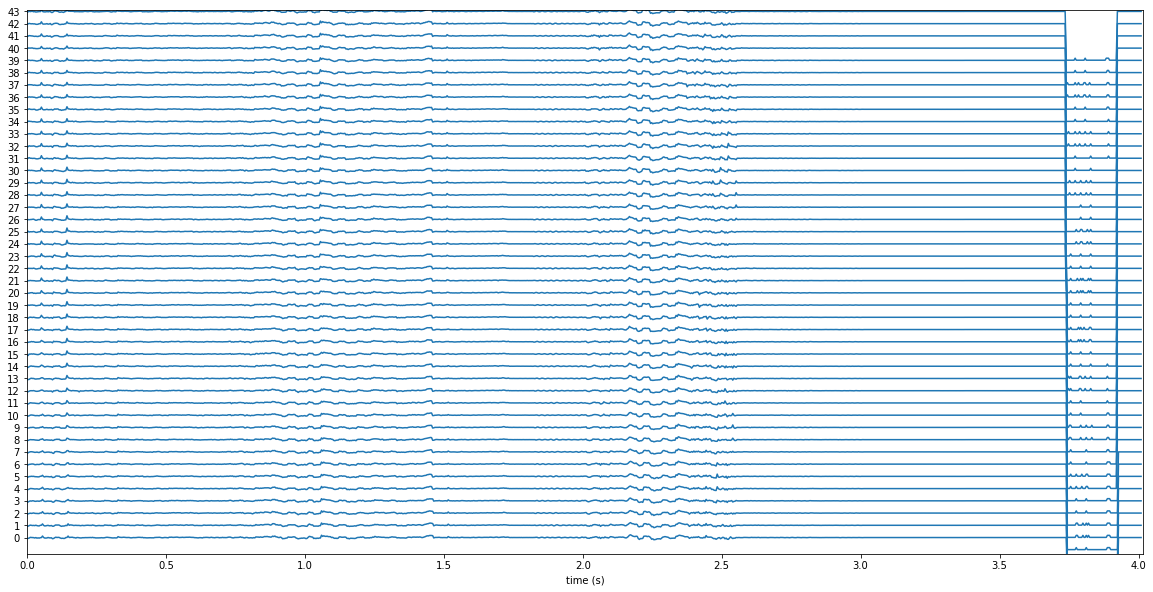

In [24]:
stacklineplot.stackplot(original.T, seconds=1004/250, ylabels=labels, yscale=3)
# stacklineplot.stackplot(original.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)

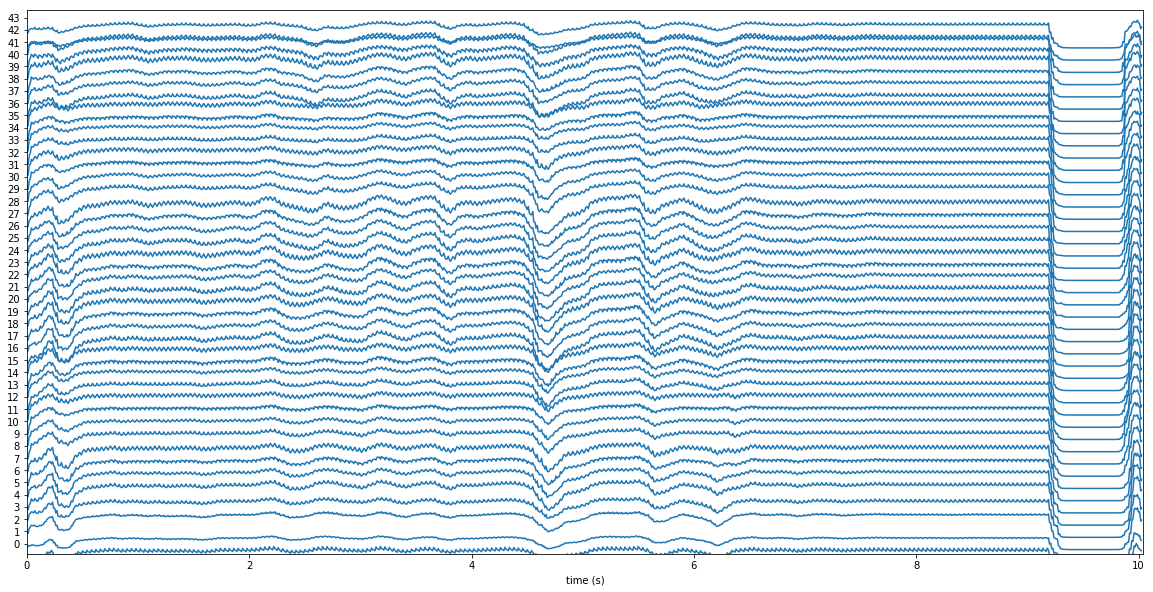

In [26]:
stacklineplot.stackplot(generated.T, seconds=1004/10000, ylabels=labels, yscale=3)
# stacklineplot.stackplot(generated.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)